# **Machine Learning Assignment**

# Introduction

**Team:** Ivana Josipovic, Adrian Miramontes, Ariadna Davila  
**Date:** 15 October 2025

This notebook presents the Computational Carpentry project for Group Q. The project is organized into two blocks. For each block:
1. The original prompt from Moodle is shown in italics and bigger letters.
2. Corresponding answers with explenations on the solution pathway.

## 1. Cost Function (30 points)
##### *Let’s focus on linear regression of the form*


##### $𝑦 ≈ 𝑓(𝑥) = 𝑋𝑤_{1} + 𝑤_0$


##### *• What are the rows of X? (2.5 point)*


Each row of X corresponds to one training example and contains all its feature values.

For instance:
$$
X = \begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1d} \\
x_{21} & x_{22} & \dots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}
$$

Each row $x_{i}$ represents the features of one sample.


##### *• What are the columns of X? (2.5 point)*


Each column of $X$ represents a feature across all training examples.

Thus, the $j^{th}$ column contains the values of feature $j$ for all samples.

##### *If we rewrite the equation as below:*

##### *$ y≈ 𝑋̃ 𝑊 $*

##### *• How does $𝑋̃$ look like in this case (i.e., how does the shape of the matrix change compare to ̃X)? (5 points)*

To include the bias term $w_0$, we add a column of ones to $X$:


$$
𝑋̃ = \begin{bmatrix}
1 & x_{11} & x_{12} & \dots & x_{1d} \\
1 & x_{21} & x_{22} & \dots & x_{2d} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \dots & x_{nd}
\end{bmatrix}
$$


So, if $X$ has shape $(n, d)$, then $𝑋̃$ has shape $(n, d + 1)$.

##### *For machine learning, we need a cost function. There are the functions we try to minimize (or sometimes maximize). Two common choices are the mean-squared error (MSE), and the mean-absolute error (MAE).*


$ MSE = \frac{1}{N} \sum_{i=1}^N (y_i - f(x_i))^2 $  

$ MAE = \frac{1}{N} \sum_{i=1}^N |y_i - f(x_i)| $ 

##### *• In the Jupyter notebook, write a Python function that computes these two cost functions given an error term 𝜀 = 𝑦 − $𝑋̃$𝑤 (5 points, 2.5 each).*

In [2]:
import numpy as np

def mse(error):
    return np.mean(error ** 2)


def mae(error):
    return np.mean(np.abs(error))


#example:
y = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
error = y - y_pred

print("MSE =", mse(error))
print("MAE =", mae(error))

MSE = 0.375
MAE = 0.5


##### *• What is the shape of these cost functions as a function of the error (i.e., either sketch the shape of the functions as a function of the error or use matplotlib to plot the cost function as a function of the error—you can focus on the one-dimensional case, 5 point).*

If we define the error $e = y_i - f(x_i)$:

  MSE grows quadratically with $e$, which gives a smooth parabola.  
  MAE grows linearly with $e$, which results in a symmetric V-shape.
  

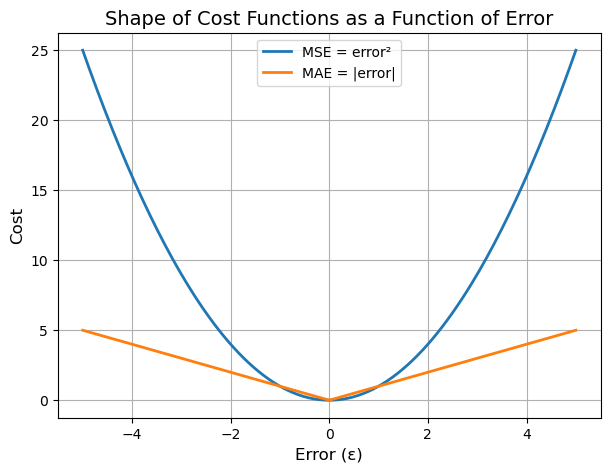

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of error values (1D case)
error = np.linspace(-5, 5, 200)

# Compute the two cost functions
mse = error ** 2
mae = np.abs(error)

# Plot the functions
plt.figure(figsize=(7, 5))
plt.plot(error, mse, label='MSE = error²', linewidth=2)
plt.plot(error, mae, label='MAE = |error|', linewidth=2)

# Add labels and legend
plt.title("Shape of Cost Functions as a Function of Error", fontsize=14)
plt.xlabel("Error (ε)", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

##### *• Are both loss functions differentiable for all 𝜀? (2.5 point) What implications does this have for gradient-based optimization like gradient descent? (2.5 point)*

  MSE is differentiable everywhere.
  
  However, MAE is not differentiable at $e = 0$. 

This implies two things:
- MSE allows smooth gradient updates.  
- MAE requires handling the non-differentiable point (for example using subgradients).

##### *• Which loss function is more sensitive to outliers (2.5 point) and why (2.5 point)?*

  MSE is more sensitive to outliers because large errors are squared, which increases their impact.  
  MAE treats all errors linearly, so it is less sensitive to outliers.